
# Project: Investigate a Dataset of Bolsa Família programme

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>300k medical appointments and its 15 variables (characteristics) of each. The most important one if the patient show-up or no-show the appointment. Variable names are self-explanatory, if you have doubts, just let me know!

>scholarship variable means this concept = https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia

>Data Dictionary

>PatientId - Identification of a patient AppointmentID - Identification of each appointment Gender = Male or Female . Female is the greater proportion, woman takes way more care of they health in comparison to man. DataMarcacaoConsulta = The day of the actuall appointment, when they have to visit the doctor. DataAgendamento = The day someone called or registered the appointment, this is before appointment of course. Age = How old is the patient. Neighbourhood = Where the appointment takes place. Scholarship = Ture of False . Observation, this is a broad topic, consider reading this article https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia Hipertension = True or False Diabetes = True or False Alcoholism = True or False Handcap = True or False SMS_received = 1 or more messages sent to the patient. No-show = True or False.

> Try to build your report around the analysis of at least one dependent variable and three independent variables.

>Neighbourhood - dependent variable
>
>


>What if that possible to predict someone to no-show an appointment?
Do woman take way more care of they health in comparison to man?
Do woman take way more care of they health in comparison to man?
Is there any correltaion with man Alcoholism true and Non-Show
Is there any correltaion with woman Alcoholism true and Non-Show


In [2]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.htmlimpo

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

df = pd.read_csv('KaggleV2-May-2016.csv',  sep=',', encoding='latin-1')

df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In [4]:
#clenanig headers with lowercase leeters

df.columns = df.columns.str.lower()

df.head(1)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [5]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

#check data types

df.dtypes

patientid         float64
appointmentid       int64
gender             object
scheduledday       object
appointmentday     object
age                 int64
neighbourhood      object
scholarship         int64
hipertension        int64
diabetes            int64
alcoholism          int64
handcap             int64
sms_received        int64
no-show            object
dtype: object

In [6]:
#check the data set

df.describe()

# Age has the negative value at minimum and also 115 at maximum which I susoect is a mistake so I will drop them
#also I will change names of columns so all will lower case which will be more convinent

,patientid,appointmentid,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.920000e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172615e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173180e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439170e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999820e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [7]:
dfage = df.query('age >= 100')
dfage['age'].value_counts()

#I will drop all 115 aged wikipedia does list few ppl but not in this country

115    5
100    4
102    2
Name: age, dtype: int64

In [8]:
# remove rows with sge = 100


df.drop(df.loc[df['age']==115].index, inplace=True)

df.describe()


,patientid,appointmentid,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received
count,1.105220e+05,1.105220e+05,110522.000000,110522.000000,110522.000000,110522.000000,110522.000000,110522.000000,110522.000000
mean,1.474950e+14,5.675305e+06,37.085350,0.098270,0.197246,0.071868,0.030401,0.022213,0.321031
std,2.560934e+14,7.129607e+04,23.104785,0.297681,0.397921,0.258270,0.171689,0.161439,0.466875
min,3.920000e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172460e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.172725e+13,5.680570e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439275e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999820e+14,5.790484e+06,102.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [9]:
dfage = df.query('age < 0')
dfage['age'].value_counts()

#I will drop all -1 aged

-1    1
Name: age, dtype: int64

In [10]:
df.drop(df.loc[df['age']==-1].index, inplace=True)

df.describe()



,patientid,appointmentid,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received
count,1.105210e+05,1.105210e+05,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000
mean,1.474921e+14,5.675304e+06,37.085694,0.098271,0.197248,0.071869,0.030401,0.022213,0.321034
std,2.560928e+14,7.129576e+04,23.104606,0.297682,0.397923,0.258272,0.171690,0.161440,0.466876
min,3.920000e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172460e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.172600e+13,5.680569e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438960e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999820e+14,5.790484e+06,102.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [11]:
#check for any duplicates

sum(df.duplicated())

#no duplicates no action here

#check the appoinmentid are there any duplicated ones

sum(df.appointmentid.duplicated())

#no duplicates as well



0

In [12]:
#check for unique values in each clumn  
df.nunique()

#the handcap has 5 unique values which is suspicious
# the age has 104 unique values which also needs verification
#the schedule day migth require cleaning for futher analysyes so I will split into date and time

patientid          61741
appointmentid     110521
gender                 2
scheduledday      103544
appointmentday        27
age                  102
neighbourhood         81
scholarship            2
hipertension           2
diabetes               2
alcoholism             2
handcap                5
sms_received           2
no-show                2
dtype: int64

In [13]:
#looking for the number if non-values

df.info()

#lokks ok no non-values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110521 entries, 0 to 110526
Data columns (total 14 columns):
patientid         110521 non-null float64
appointmentid     110521 non-null int64
gender            110521 non-null object
scheduledday      110521 non-null object
appointmentday    110521 non-null object
age               110521 non-null int64
neighbourhood     110521 non-null object
scholarship       110521 non-null int64
hipertension      110521 non-null int64
diabetes          110521 non-null int64
alcoholism        110521 non-null int64
handcap           110521 non-null int64
sms_received      110521 non-null int64
no-show           110521 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 12.6+ MB


In [14]:
df['handcap'].value_counts()

#there is 199 with the mistake all the records with value 2/3/4 drop them? I think I will drop those

0    108284
1      2038
2       183
3        13
4         3
Name: handcap, dtype: int64

In [15]:
df.drop(df.loc[df['handcap']==2].index, inplace=True)        
df['handcap'].value_counts()     

0    108284
1      2038
3        13
4         3
Name: handcap, dtype: int64

In [16]:
df.drop(df.loc[df['handcap']==3].index, inplace=True)        
df['handcap'].value_counts()

0    108284
1      2038
4         3
Name: handcap, dtype: int64

In [17]:
df.drop(df.loc[df['handcap']==4].index, inplace=True)        
df['handcap'].value_counts()

0    108284
1      2038
Name: handcap, dtype: int64

In [18]:
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [19]:
df['scheduledday_day'] = df.scheduledday.str[:10]
df['appointmentday_day'] = df.appointmentday.str[:10]
df['scheduledday_time'] = df.scheduledday.str[10:]
df['appointmentday_time'] = df.appointmentday.str[10:]
df['gender'].replace('F', 0,inplace=True)
df['gender'].replace('M', 1,inplace=True)
df['no-show'].replace('Yes', 0,inplace=True)
df['no-show'].replace('No', 1,inplace=True)

df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show,scheduledday_day,appointmentday_day,scheduledday_time,appointmentday_time
0,2.987250e+13,5642903,0,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,1,2016-04-29,2016-04-29,T18:38:08Z,T00:00:00Z
1,5.589980e+14,5642503,1,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,1,2016-04-29,2016-04-29,T16:08:27Z,T00:00:00Z
2,4.262960e+12,5642549,0,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,1,2016-04-29,2016-04-29,T16:19:04Z,T00:00:00Z
3,8.679510e+11,5642828,0,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1,2016-04-29,2016-04-29,T17:29:31Z,T00:00:00Z
4,8.841190e+12,5642494,0,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,1,2016-04-29,2016-04-29,T16:07:23Z,T00:00:00Z


In [20]:
#data set to explor population and drop duplicates to have singel records of patients
dfe = df[['patientid','gender','age','scholarship','hipertension','diabetes','alcoholism','handcap']]
dfe.head()

,patientid,gender,age,scholarship,hipertension,diabetes,alcoholism,handcap
0,2.987250e+13,0,62,0,1,0,0,0
1,5.589980e+14,1,56,0,0,0,0,0
2,4.262960e+12,0,62,0,0,0,0,0
3,8.679510e+11,0,8,0,0,0,0,0
4,8.841190e+12,0,56,0,1,1,0,0


In [21]:
#drop duplicates from dfe

sum(dfe.duplicated())



46971

In [22]:
#drop duplicates from dfe
dfe.drop_duplicates(inplace = True)



/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### What's the most common disease across patientst

In [23]:
dfe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63351 entries, 0 to 110524
Data columns (total 8 columns):
patientid       63351 non-null float64
gender          63351 non-null int64
age             63351 non-null int64
scholarship     63351 non-null int64
hipertension    63351 non-null int64
diabetes        63351 non-null int64
alcoholism      63351 non-null int64
handcap         63351 non-null int64
dtypes: float64(1), int64(7)
memory usage: 4.3 MB


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110322 entries, 0 to 110526
Data columns (total 18 columns):
patientid              110322 non-null float64
appointmentid          110322 non-null int64
gender                 110322 non-null int64
scheduledday           110322 non-null object
appointmentday         110322 non-null object
age                    110322 non-null int64
neighbourhood          110322 non-null object
scholarship            110322 non-null int64
hipertension           110322 non-null int64
diabetes               110322 non-null int64
alcoholism             110322 non-null int64
handcap                110322 non-null int64
sms_received           110322 non-null int64
no-show                110322 non-null int64
scheduledday_day       110322 non-null object
appointmentday_day     110322 non-null object
scheduledday_time      110322 non-null object
appointmentday_time    110322 non-null object
dtypes: float64(1), int64(10), object(7)
memory usage: 16.0+ MB


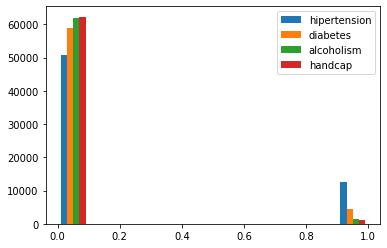

In [37]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.

a = dfe['hipertension']
b = dfe['diabetes']
c= dfe['alcoholism']
d= dfe['handcap']

plt.hist([a, b,c,d], label=['hipertension', 'diabetes','alcoholism','handcap'])
plt.legend(loc='upper right')
plt.show()


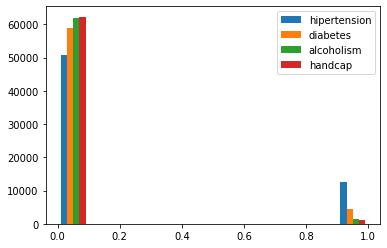

In [38]:
a = dfe['hipertension']
b = dfe['diabetes']
c= dfe['alcoholism']
d= dfe['handcap']

plt.hist([a, b,c,d], label=['hipertension', 'diabetes','alcoholism','handcap'])
plt.legend(loc='upper right')
plt.show()


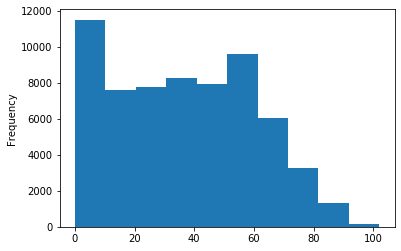

In [27]:
dfe['age'].plot(kind='hist');

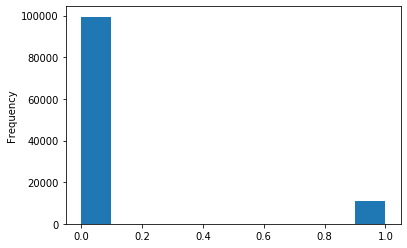

In [28]:
df['scholarship'].plot(kind='hist');

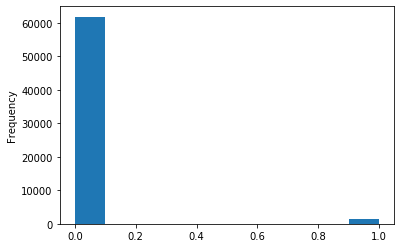

In [29]:
dfe['alcoholism'].plot(kind='hist', );

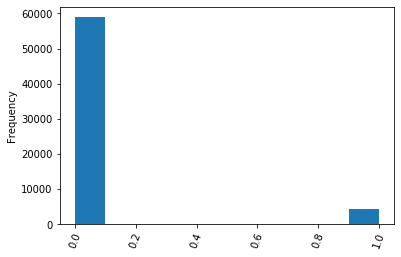

In [30]:
dfe['diabetes'].plot(kind='hist', rot=70)

### Research Question 2  (Replace this header name!)

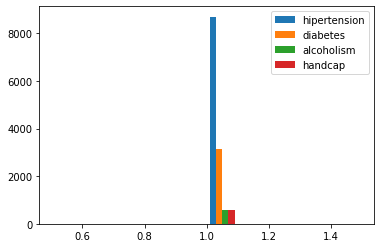

In [45]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
dfef = dfe.query('gender == 0')


f= dfef.query('hipertension==1')
g= dfef.query('diabetes == 1')
h= dfef.query('alcoholism == 1')
i= dfef.query('handcap == 1')

a = f['hipertension']
b = g['diabetes']
c= h['alcoholism']
d= i['handcap']

plt.hist([a, b,c,d], label=['hipertension', 'diabetes','alcoholism','handcap'])
plt.legend(loc='upper right')
plt.show()






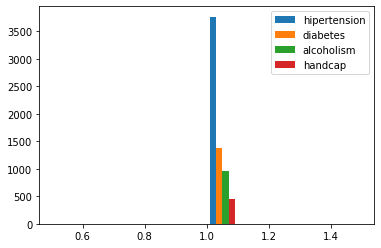

In [46]:
dfem = dfe.query('gender == 1')

f= dfem.query('hipertension==1')
g= dfem.query('diabetes == 1')
h= dfem.query('alcoholism == 1')
i= dfem.query('handcap == 1')

a = f['hipertension']
b = g['diabetes']
c= h['alcoholism']
d= i['handcap']

plt.hist([a,b,c,d], label=['hipertension', 'diabetes','alcoholism','handcap'])
plt.legend(loc='upper right')
plt.show()



<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!

In [ ]:
Across 

